# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Aeden Jameson

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

## Prepare & Load Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import sklearn.preprocessing as sk
%matplotlib inline


def read_auto_data(fileName = "Automobile price data _Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price

fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"
auto_prices = read_auto_data(fileName)

## Step 1: Test Data for Normality

To start off we will look at a simple histogram of our data to get a feel for the shape. 

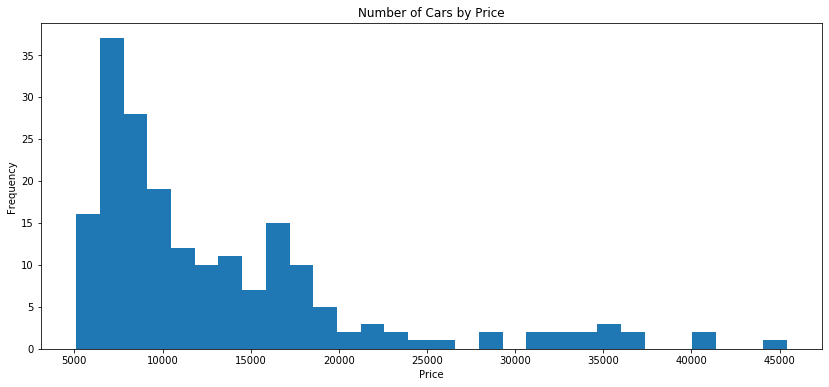

In [2]:
fig = plt.figure(figsize=(14,6)) # define plot area
ax = fig.gca() # define axis    
ax.set_title('Number of Cars by Price') # Give the plot a main title
ax.set_xlabel('Price') # Set text for the x axis
auto_prices.loc[:,'price'].plot.hist(bins = 30, ax = ax);

#### Observation:

  Since price is defined in a range 0 < p < inf, the distribution of above is fairly skewed, with a fairly low mean and high variance this suggests that perhaps our price random variable follows a log normal distribution. Next we'll do a Q-Q plot of both the origial prices and the log of the prices.

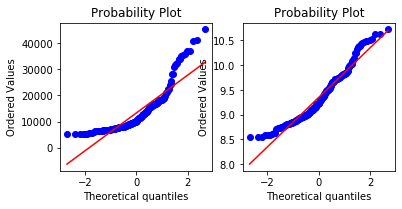

In [3]:
def qq_plot(vec1, vec2):
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax2 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax2) ## Plot the right subplot

qq_plot(sorted(auto_prices.loc[:,"price"].tolist()), sorted(np.log(auto_prices.loc[:,"price"].tolist())))  



As we can see in the plot on the right with the tranformed prices lie along the straight line except for at the ends.

### Kolmogorov-Smirnov Test 

Before performing the formal K-S test let's investigate the CDF's of the normalized auto prices and a theoretical standard normal since the test gives the maximum vertical distance between the respective CDF's. If visually they don't look quite close there would be no reason to bother with a formal test.

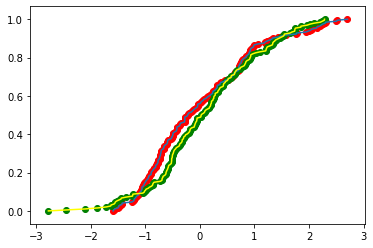

In [4]:
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green')


norm_dist = np.random.normal(size = 195).tolist()
normalized_prices = sk.scale(np.log10(auto_prices.loc[:,"price"]))
plot_cums(normalized_prices, norm_dist)    

As we can see the CDF's of the normalized auto prices and a theoretical standard normal are quite close. Now let's perform a formal K-S test.

In [5]:
from scipy.stats import kstest 
ks_statisic, pvalue = kstest(normalized_prices, 'norm')
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue));

KS-statistic = 0.1029553721679255
P-value = 0.029757993611013965


#### Conclusion

The K-S statistic is large and the p-value is quite small that is less than .05. It appears that we can reject the null hypothesis and conclude our car prices random variable was drawn from a normal distribution.

## Step 2: Test Significance



**Null Hypothesis:** The mean price of diesel cars is equal to the mean price of gas cars

**Alternative Hypothesis:** The mean price of diesel cars is equal to the mean price of gas cars

**Cutoff:** 0.05

- **Select a random sample from the population:** Randomly assign a cookie to new site users that tells the server to show A or B website. One of these web sites is the original, and the other has the larger logo. In statistical terminology we call these two cases **treatments**.  

- **Calculate the test statistic** to compare observations to what we expect to observe. If the test statistic is beyond the cutoff value we say the differences are **significant** and reject the null hypothesis. 

